
<a name="T_D661B2EE"></a>

# <span style="color:rgb(213,80,0)">Hydrogen Atom</span>
<a name="beginToc"></a>

## Table of Contents
[Radial Equation for Coulomb Potential](#H_E90B0EBA)

&emsp;[Numerical Solution of Radial Equation ](#H_C97D2EF2)

&emsp;[Solving Radial Equation Analytically](#H_7C157E53)

[Ground State Energy](#H_51813CB5)

[Spatial 3D Wave Function](#H_0845AE67)

[Shell Model of an Atom](#H_F2E6B298)

&emsp;[Radial Electron Density in Shell Model](#H_CD8B0DFB)

<a name="endToc"></a>
<a name="H_E90B0EBA"></a>

## Radial Equation for Coulomb Potential

The hydrogen atom consists of a heavy, that we will assume below to be infinitely heavy in Born\-Oppenheimer approximation, hence motionless proton of charge $e$ and electron of mass $m_e$ and charge $-e$ that is bound to the proton by Coulomb's attraction. The Coulomb attraction potential depends on distance $r$ between electron and proton (in SI units) as

<a name="M_BEDD8505"></a>

$$\begin{array}{cc} V(r)=-\frac{e^2 }{4\pi \epsilon_0 }\frac{1}{r}, & ~~~~(1) \end{array}$$

where $\epsilon_0$ is electric permittivity and $e$ is proton's charge.


The radial equation for the hydrogen atom is (see Eq. (21) in live script *Spherically Symmetric Potential*)

<a name="M_569BA084"></a>

$$\begin{array}{cc} -\frac{\hbar^2 }{2m_e }\frac{d^2 u}{dr^2 }+\left\lbrack -\frac{e^2 }{4\pi \epsilon_0 }\frac{1}{r}+\frac{\hbar^2 }{2m_e }\frac{\ell (\ell +1)}{r^2 }\right\rbrack u=Eu. & ~~~~(2) \end{array}$$

Above $u(r)=rR(r)$ , with a complete coordinate wave function $\psi (r,\theta ,\phi )=R(r)Y(\theta ,\phi )$ , and $\ell \ge 0$ is a non\-negative integer \- the angular momentum quantum number. Angular momentum is a conserved (vector) quantity in problems with centrally symmetric potential.


Solutions of Eq. ([2](#M_569BA084)), eigen values $E$ and corresponding eigen functions $u(r)$ , depend on quantum number $\ell$ . For different values of $\ell =0,1,2,...$ electron feels  different effective potentials, sum of two terms in square brackets in the left\-hand\-side of Eq. ([2](#M_569BA084)). A code snippet below plots radial dependence of effective potential (in atomic Hartree units) for $\ell =0,1,2,3$ .



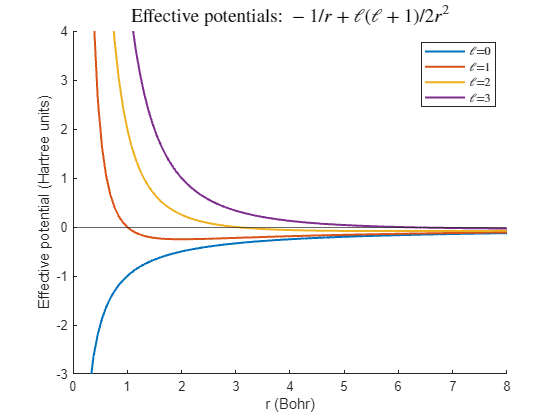

In [1]:
r = linspace(0.3, 8, 100)';  % radial grid
figure
xlabel("r (Bohr)")
ylabel("Effective potential (Hartree units)")
title("Effective potentials: $-{1}/{r}+{\ell(\ell+1)}/{2r^{2}}$ ",interpreter='Latex', fontsize=14)
ylim([-3,4])
Legend=cell(4,1);
for l=0:3
    line(r, -1./r+l*(l+1)./(2*r.^2));
    Legend{l+1}=strcat(' $\ell$ =', num2str(l));
end
legend(Legend,interpreter='Latex');
yline(0, handleVisibility='off') % suppressing legend of horizontal y=0 line


In general, for a given $\ell$ and depending on $V(r)$ , Eq. ([2](#M_569BA084))  can have infinite number of physically acceptable normalizable (hence describing negative energy bound\-states) solutions for $u(r)$ (eigen functions) and $E$ (eigen values) which we can enumerate by a positive integer $n_{\ell } =1,2,...$


 $(u_{1,\ell } (r),E_{1,\ell } )$ , $(u_{2,\ell } (r),E_{2,\ell } )$ ,..., where $E_{1,\ell } \le E_{2,\ell } \le ...$


For the Coulomb potential Eq. ([1](#M_BEDD8505)), as we will see [below](#H_C97D2EF2),


 $E_{n_{\ell } ,\ell } =-0.5E_h /(n_{\ell } +l)^2$ ,


as indicated in Fig.[1](#M_3BCDF075), where $E_h$ is Hartree energy. Hence energy levels of hydrogen atom depend on the sum $n_{\ell } +\ell$ .


The absolute lowest energy solution of hydrogen atom (ground state energy) is realized for $\ell =0$ case (called $1s$ state), since the effective potential that electron feels is most attractive for $\ell =0$ . The ground state energy of hydrogen atom is $E_{1,0} =E_{1s} =-0.5E_h$ , and this energy level is non\-degenerate, not considering spin degeneracy (spin degeneracy of hydrogen atom's ground state is lifted by hyperfine coupling between electron's and proton's spins, see Ref.  \[[1](#M_4A7A5AA6)\]).

<a name="M_3BCDF075"></a>

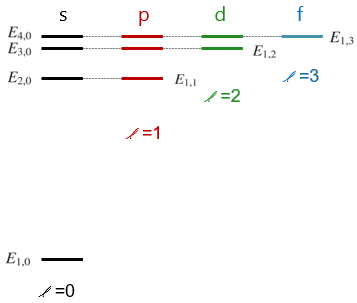


Figure1: Sketch of hydrogen's energy levels $E_{n_{\ell } ,\ell }$ in different $\ell$ sectors.





The positive integer $n_0$ , enumerating $s$ \-states' energy levels $1s$ , $2s$ , $3s$ ,... will be denoted in the following by $n$ and it is called **the principle quantum number**. All different energy eigen values (energy levels) of hydrogen atom can be labeled by principle quantum number alone and these energy levels are $n$ \-times degenerate with $\ell$ : For any positive integer $n$ there exist same energy solutions as $E_{ns}$ for the following values of $\ell =0,1,...,n-1$ . The degeneracy of energy levels with $\ell$ is due to high symmetry of the Coulomb potential in 3D, see Ref. \[[2](#M_B67A6622)\]. The degeneracy with respect to a magnetic quantum number $m=-\ell ,-\ell +1,...\ell$ (which does not appear in Eq. ([2](#M_569BA084))) is, on the other hand, entirely due to spherical symmetry of $V(r)$ that led to separation of variables $\psi (r,\theta ,\phi )=R(r)Y(\theta ,\phi )$ and eventually to energy eigen value equation Eq. ([2](#M_569BA084)).

<a name="H_C97D2EF2"></a>

### Numerical Solution of Radial Equation

In code snippet below we obtain numerically eigen values $E$ of radial equation Eq. ([2](#M_569BA084)) for different sectors of $\ell$ , adopting [Hartree atomic units](https://en.wikipedia.org/wiki/Hartree_atomic_units). In atomic units Eq. ([2](#M_569BA084)) looks:


 $-\frac{1}{2}\frac{d^2 u}{dr^2 }-\left\lbrack \frac{1}{r}-\frac{\ell (\ell +1)}{2r^2 }\right\rbrack u=Eu$ .

<a name="M_CC474038"></a>

We define a finite radial grid and approximate second derivative using central finite difference approximation. We show that up to negligible error caused by finite\-size, discrete approximation and especially by numerically challenging $r=0$ point for $\ell =0$ sector, numericall obtained energy levels are: $E_{n_{\ell } ,\ell } =-0.5/(n_{\ell } +l)^2$ .


In [2]:
l=1;     % select angular momentum quantum number
Rmax = 50*(l+1);                % maximal radial extent of simulation box in units of Bohr radius
Nr = 500;                       % number of radial points
Rmin=0.1;                       % avoid r=0 point, especially for l=0 sector. For l>0 decrease Rmin to 0.00001 to see that results are stable
r = linspace(Rmin, Rmax, Nr)';  % radial grid
dr=Rmax/Nr;                     % radial step
d  = ones(Nr,1);
Lap_r  = spdiags([d -2*d d],[-1 0 1],Nr,Nr)/dr^2;        % second derivative as Nr x Nr sparse matrix with -2/dr^2 on main (0) diagonal and 1/dr^2 on lower (-1) and upper (1) diagonals
H =-0.5*Lap_r + spdiags(-1./r+l*(l+1)./(2*r.^2),0,Nr,Nr); % sparse Hamiltonian matrix

[V,E]=eigs(H,4,'smallestreal'); % 4 lowest eigen values in each angular momentum sector
diag(E)

ans = 4x1    
   -0.1250
   -0.0555
   -0.0312
   -0.0200


Next we plot these 4 eigen states and observe that for any $\ell$ only the lowest energy state does not have node (does not change sign). All other states must necessarily change sign (have nodes) in order to be orthogonal to the lowest energy (nodeless) state. Number of nodes is determined by $n_{\ell }$ : first excited state has 1 node, second 2 nodes, etc. We suggest reader to modify Coulomb potential by adding small perturbation (say $\sim r^{-1/2}$ ) to see whch of the above properties observed for the Coulomb potential remain to hold for generic case. Namely, it can be shown that for a generic spherically symmetric potential (effectively reducible to 1D problem) [ground state should not have nodes](https://en.wikipedia.org/wiki/Ground_state). First lowest excited state has 1 node, second excited state has 2 nodes, etc.



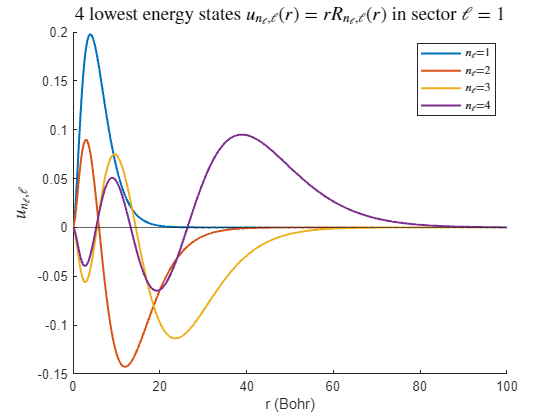

In [3]:
figure
Legend=cell(4,1);
for n=1:4
    line(r, V(:,n));
    Legend{n}=strcat(' $n_\ell$ =', num2str(n));
end
legend(Legend,interpreter='Latex');
yline(0, handleVisibility='off');
xlim([0,50*(l+1)]);
xlabel("r (Bohr)");
ylabel(" $u_{n_{\ell},\ell}$ ", interpreter="Latex",fontsize=14)
title("4 lowest energy states $u_{n_{\ell},\ell}(r)=rR_{n_{\ell},\ell}(r)$ in sector $\ell =$ "+ num2str(l),interpreter="Latex", fontsize=14 )

<a name="H_812E68CB"></a>
<a name="H_7C157E53"></a>

### Solving Radial Equation Analytically

To solve Eq. ([2](#M_569BA084)) for negative enegy (bound) states, we introduce a real parameter $\kappa$ :

<a name="kappa"></a>

$$\begin{array}{cc} \kappa =\frac{\sqrt{-2m_e E}}{\hbar }. & ~~~~(3) \end{array}$$

From the relation $E=-\hbar^2 \kappa^2 /(2m_e )$ , one can anticipate that $\kappa$ has dimension of the wave vector, hence \[ $\kappa$ \]=1/length. To check dimension of $\kappa$ , we can create <samp>symunit</samp> variable <samp>v</samp> and use <samp>simplify</samp> function


In [4]:
v = symunit;
simplify(sqrt(v.m_e*v.J)/v.h_bar)


We see that dimension of $\kappa$ is inverse length. We can confirm this result by using the  <samp>checkUnits</samp> function


In [5]:
checkUnits(sqrt(v.m_e*v.J)/v.h_bar==1/v.m,'Compatible')

ans = logical
   1


Dividing both sides of Eq. ([2](#M_569BA084)) by $E$ gives

<a name="M_93EA0852"></a>

$$\begin{array}{cc} \frac{1}{\kappa^2 }\frac{d^2 u}{dr^2 }=\left\lbrack 1-\frac{m_e e^2 }{2\pi \epsilon_0 \hbar^2 \kappa }\frac{1}{(\kappa r)}+\frac{\ell (\ell +1)}{(\kappa r)^2 }\right\rbrack u. & ~~~~(4) \end{array}$$

This suggests that we introduce dimensionless parameters

<a name="M_E3629A68"></a>

$$\begin{array}{cc} \rho =\kappa r,~~\;\textrm{and}\;~~\rho_0 =\frac{m_e e^2 }{2\pi \epsilon_0 \hbar^2 \kappa }. & ~~~~(5) \end{array}$$

We can check that $\rho_0$ is dimensionless, hence expression in numerator in Eq. ([5](#M_E3629A68)) has same dimension as denominator


In [6]:
simplify(v.m_e*v.e^2/(v.e_0*v.h_bar^2*1/v.m))

In [7]:
checkUnits(v.m_e*v.e^2==v.e_0*v.h_bar^2*1/v.m,'Compatible')

ans = logical
   1


In dimensionless variables radial equation Eq. ([4](#M_93EA0852)) becomes:

<a name="M_49F5C63F"></a>

$$\begin{array}{cc} \frac{d^2 \tilde{u} (\rho )}{d\rho^2 }=\left\lbrack 1-\frac{\rho_0 }{\rho }+\frac{\ell (\ell +1)}{\rho^2 }\right\rbrack \tilde{u} (\rho ), & ~~~~(6) \end{array}$$
<a name="M_80D0606D"></a>

where $\tilde{u} (\rho )=\tilde{u} (\kappa r)=u(r)$ .


We use symbolic computation to solve Eq. ([6](#M_49F5C63F))


In [8]:
syms u_tilde(rho) rho0 l a0 r
assume(rho,{'positive','real'})
assume(rho0,{'real'})
assume(a0,{'positive','real'})
ode = laplacian(u_tilde,rho)==(1-rho0/rho+l*(l+1)/rho^2)*u_tilde

In [9]:
dsolve(ode)


A generic solution to second order differential equation Eq. ([6](#M_49F5C63F)) is given by linear combination of Whittaker M and W functions with numerical constants $C_1$ and $C_2$ . We need to specify now proper boundary conditions. $u(r=\infty )=0$ boundary condition follows from the fact that we are looking for the localizes bound state solutions (negative energy solutions) and for the left\-boundary condition $u(r=0)=0$ see reasoning leading to Eq. (21c) in live script *Spherically Symmetric Potential.*

<a name="H_F21F1157"></a>

Note, if $\rho_0 \not= 2n$ , where $n$ is positive integer, or if $\ell \ge n$ , then no linear combination of Whittaker M and W functions can satisfy both boundary conditions simultaneously: $u(0)=u(\infty )=0$ (except of the trivial unphysical case with $C_1 =C_2 =0$ ). Hence mathematics dictates quantization of $\rho_0$ to positive even integers $2n$ and restricts value of integer $\ell$ to $\ell <n$ : Physically acceptable, vanishing both at origin and at infinity, solutions of  Eq. ([6](#M_49F5C63F)), describing the bound states of electron (negative energy normalizable states) are only possible for $\rho_0 =2n$ (hence $\kappa =1/(na_0 )$ ) with positive integer $n$ such that $n>\ell$ .


In general, Whittaker M and W functions are linearly independent functions, but for the physically acceptable solutions ( $\rho_0 =2n$ and $n>\ell \ge 0$ , with both $n$ and $\ell$ integers) they coincide up to a constant factor and furthermore they are related with Laguerre polunomial \[[\*](#M_15B4DF24)\], see Eq. ([28](#M_F5B1AFC4)). We show this below by plotting these 3 functions together.



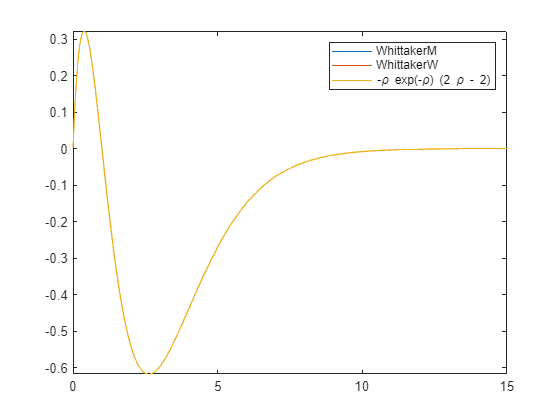

In [10]:
% plot of 2 solutions
u1 = whittakerM(rho0/2, l + 1/2, 2*rho);
u2 = whittakerW(rho0/2, l + 1/2, 2*rho);
u3=exp(-rho)*rho^(l+1)*laguerreL(rho0/2-l-1,2*l+1,2*rho); % yet another representation of the Radial equation solution
                                                          % in terms of the generalized Laguerre polinomials Eq.(15)
rho00=4;
l_allowed = string((0:rho00/2-1));
l0=double(l_allowed(1));  % note l must be less than rho0/2
% alpha is constant factor between two Whittaker functions
alpha=whittakerM(rho00/2, l0 + 1/2, 1)/whittakerW(rho00/2, l0 + 1/2, 1);
% beta is a constant factor between Whittaker W and u3
beta=whittakerW(rho00/2, l0 + 1/2, 1)/ (exp(-1/2)*(1/2)^(l0+1)*laguerreL(rho00/2-l0-1,2*l0+1,1));
figure
fplot(subs(u1,{rho0,l},{rho00,l0})/(alpha*beta),[0,15])
hold on
fplot(subs(u2,{rho0,l},{rho00,l0})/beta,[0,15])
legend({'WhittakerM','WhittakerW'})
hold on
fplot(subs(u3,{rho0,l},{rho00,l0}),[0,15]);


To make a closer contact to quantum mechanics textbooks we contrast Eq. ([6](#M_80D0606D)) with a solution of an associated Laguerre function $y_j^k$ , with $j=0,1,2,...$ and $k=1,2,3,...$ satisfying the following second order differential equation:

<a name="M_EFE5E8EB"></a>

$$\begin{array}{cc} \frac{d^2 y_j^{k } (x)}{dx^2 }=\left(1-\frac{2j+k+1}{x}+\frac{k^2 -1}{4x^2 }\right)y_j^k (x). & ~~~~(7) \end{array}$$

Solution to Eq. ([7](#M_EFE5E8EB)) is


$$\begin{array}{cc} y_j^k (x)=e^{-x} x^{(k+1)/2} L_j^k (2x), & ~~~~(8) \end{array}$$

where


$$\begin{array}{cc} L_q^p (x)=(-1)^p {\left(\frac{d}{dx}\right)}^p L_{p+q} (x) & ~~~~(9) \end{array}$$

is **associated Laguerre polynomial**, and


$$\begin{array}{cc} L_q (x)=\frac{e^x }{q!}{\left(\frac{d}{dx}\right)}^q \left(e^{-x} x^q \right) & ~~~~(10) \end{array}$$

is the $q$ \-th **Laguerre polynomial**. Thus, to map Eq. ([6](#M_80D0606D)) to Eq. ([7](#M_EFE5E8EB))  we have to make the following identifications:


$$\begin{array}{cc} \rho_0 =2j+k+1 & ~~~~(11) \end{array}$$

and

<a name="M_1C5FBF33"></a>

$$\begin{array}{cc} \ell (\ell +1)=\frac{k^2 -1}{4}. & ~~~~(12) \end{array}$$

From Eq. ([12](#M_1C5FBF33)) we get that


$$\begin{array}{cc} k=2\ell +1 & ~~~~(13) \end{array}$$

so that,

<a name="M_08A3C567"></a>

$$\begin{array}{cc} \rho_0 =2(j+\ell +1)\equiv 2n, & ~~~~(14) \end{array}$$

where $n$ is **principal quantum number**. We have a solution of $\tilde{u}$ as


$$\begin{array}{cc} \tilde{u} (\rho )={\tilde{u} }_{n\ell } (\rho )=e^{-\rho } \rho^{\ell +1} L_{n-\ell -1}^{2\ell +1} (2\rho ) & ~~~~(15) \end{array}$$

 and


$$\begin{array}{cc} R_{n\ell } (r)=\frac{{\tilde{u} }_{n\ell } (\kappa r)}{r}=\frac{1}{r}(\kappa r)^{\ell +1} e^{-\kappa r} L_{n-\ell -1}^{2\ell +1} (2\kappa r). & ~~~~(16) \end{array}$$

So far we did not care about normalizing radial wave function. If we impose normalization

<a name="M_81FD3BAE"></a>

$${\int_0^{\infty } R_{n\ell }^2 r^2 dr=1,~~~~(16a)}$$

then normalized solution is $R_{n\ell } (r)=\frac{const}{r}(\kappa r)^{\ell +1} e^{-\kappa r} L_{n-\ell -1}^{2\ell +1} (2\kappa r)$ , with $\kappa =1/(na_0 )$ (see Eqs. ([19](#M_761033F2)) and ([20](#M_F135D1FF)) below) and $const=\frac{2^{\ell +1} }{\sqrt{a_0 n}}\sqrt{\frac{(n-\ell -1)!}{n(n+\ell )!}}$ . Importantly, apart from the numerical factors, the normalization constant carries an additional dimension of inverse length to the power of one\-half, $\frac{1}{\sqrt{a_0 }}$ .


Properly normalized $R_{n\ell }$ can be read in Eq. ([25](#M_FA240F6E)) below.


In [11]:
n = 3;
% we can take any of the 3 equivalent functions u1, u2, or u3
u = subs(u2,rho,(r/(a0*n)));
R = u/r;
figure
subplot(1,2,1)
hold on
curve1=zeros(1,n+1);
curve1(1) = yline(0,'LineStyle','--');
subplot(1,2,2)
hold on
curve2=zeros(1,n+1);
curve2(1) = yline(0,'LineStyle','--');
r0_list = [];
for ll=0:n-1
    Rnl = subs(R,{rho0,l},{2*n,ll});
    % normalization of R(r)
    integral_R = int(Rnl^2*r^2,r,[0,inf]);
    Rnl = Rnl/sqrt(integral_R);
    % check if need scale by -1
    ipos = double(subs(Rnl,[a0,r],[1,1e-2]) > 0);
    Rnl = Rnl * (-1)^(ipos-1);
    % print and plot R(r)
    fprintf('R%d%d = ', n,ll);
    displayFormula("Rnl")
    subplot(1,2,1)
    curve1(ll+2) = fplot(subs(Rnl,a0,1),'DisplayName',[' $\ell$ =',num2str(ll)]);
    subplot(1,2,2)
    curve2(ll+2) = fplot(subs(Rnl^2*r^2,a0,1),'DisplayName',[' $\ell$ =',num2str(ll)]);
    int(subs(Rnl^2*r^2,a0,1),r,0,inf);
    P = subs(Rnl^2*r^2,a0,1);
    r0 = solve(diff(P,r) == 0, r);
    g0 = double(subs(P,r,r0)) > 0;
    r0 = round(double(r0(g0)),3);
    P = subs(P,r,r0);
    for i=1:length(r0)
        line([r0(i) r0(i)],[0,P(i)],'Color',[.7 .7 .7],'LineStyle','--')
    end
    r0_list = [r0_list; r0];
end

R30 =

R31 =

R32 =


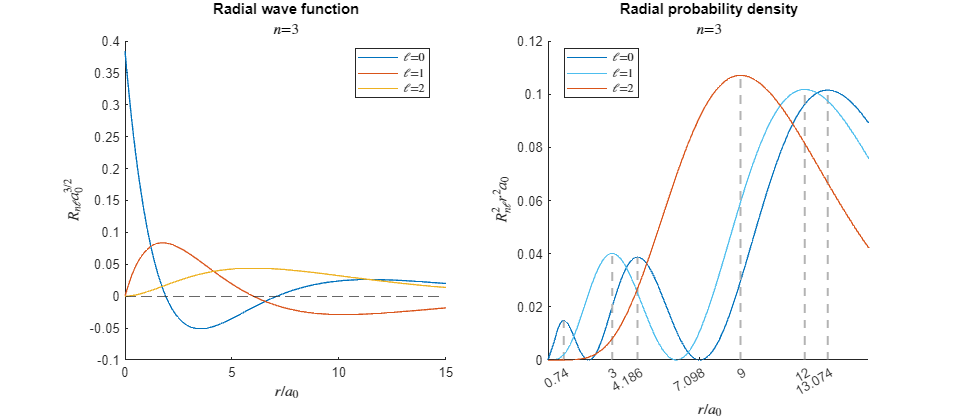

In [12]:
subplot(1,2,1)
legend(curve1(2:end),'Location','best', Interpreter='latex')
xlim([0 15])
xticks([0 5 10 15])
xlabel(' !!!EQ_146!!! ',Interpreter='latex')
ylabel(' !!!EQ_147!!! ',Interpreter='latex')
title("Radial wave function")
subtitle([' !!!EQ_43!!! =', num2str(n)],Interpreter='latex')
hold off
subplot(1,2,2)
legend(curve2(2:end),'Location','best',Interpreter='latex')
xlim([0 15])
xticks(sort(r0_list))
xlabel(' !!!EQ_146!!! ',Interpreter='latex')
ylabel(' !!!EQ_150!!! ',Interpreter='latex')
title("Radial probability density")
subtitle([' !!!EQ_43!!! =', num2str(n)],Interpreter='latex')
hold off
pos = get(gcf, 'Position');
set(gcf, 'Position',pos+[0 0 400 0])


In the above plots, we multiplied normalized radial wave function and radial probability density with appropriate powers of Bohr radius to make $y$ axis in both cases dimensionless, similar to $x$ \-axis that measures the distance in units of Bohr radius, hence is dimensionless.


Plotting the radial wave function with different values of $\ell$ , we see that except for $s$ \-orbital states (with $\ell =0$ ), all other states with $\ell >0$  ( $p,d,f$ ,...) have nodes (vanish) at the position of the nucleus $r=0$ . This is the reason why contact Fermi interaction in hyperfine coupling is relevant for $s$ \-orbital electrons \[[1](#M_4A7A5AA6)\].

<a name="H_51813CB5"></a>

## Ground State Energy

By definition of $\rho_0$ in Eq. ([5](#M_E3629A68)) and $\kappa$ in Eq. ([3](#kappa)), energy of the bound state $E$ is expressed as:

<a name="E"></a>

$$\begin{array}{cc} E=-\frac{\hbar^2 \kappa^2 }{2m_e }=-\frac{m_e e^4 }{8\pi^2 \epsilon_0^2 \hbar^2 \rho_0^2 }. & ~~~~(17) \end{array}$$

So the allowed negative eigen energies (corresponding to bound states) of hydrogen atom due to Eq. ([14](#M_08A3C567)) are

<a name="M_BD8E82B6"></a>

$$\begin{array}{cc} E_n =-\left\lbrack \frac{m_e }{2\hbar^2 }{\left(\frac{e^2 }{4\pi \epsilon_0 }\right)}^2 \right\rbrack \frac{1}{n^2 }=\frac{E_1 }{n^2 },~~n=1,2,3,\ldots & ~~~~(18) \end{array}$$

This is the famous Bohr formula \- one of the most important achievements of quantum mechanics. Combining Eqs. ([17](#E)) and ([18](#M_BD8E82B6)), we find that

<a name="M_761033F2"></a>

$$\begin{array}{cc} \kappa =\left(\frac{m_e e^2 }{4\pi \epsilon_0 \hbar^2 }\right)\frac{1}{n}=\frac{1}{a_0 n}, & ~~~~(19) \end{array}$$

where

<a name="M_F135D1FF"></a>

$$\begin{array}{cc} a_0 \equiv \frac{4\pi \epsilon_0 \hbar^2 }{m_e e^2 }=0.529\times 10^{-10} {\mathrm{m}} & ~~~~(20) \end{array}$$

is the Bohr radius. It follows that


$$\rho =\frac{r}{a_0 n}.~~~~(21)$$

The ground state (that is, the state of the lowest energy) corresponds to the case $n=1$ ; putting in the accepted values for the physical constants, we get:

<a name="M_EA70DCBE"></a>

$$\begin{array}{cc} E_1 =-\left\lbrack \frac{m_e }{2\hbar^2 }{\left(\frac{e_e \cdot e_n }{4\pi \epsilon_0 }\right)}^2 \right\rbrack =-\frac{E_h }{2}\simeq -13.6eV. & ~~~~(22) \end{array}$$

In other words, the absolute value of binding energy between the proton and electron in the ground state of hydrogen atom (the minimal amount of energy needed to ionize the hydrogen atom that is in the ground state) is half a Hartree $0.5E_h \simeq 13.6eV$ .


This is a hugely important number in physics, not only for micro world, but also for astronomy and cosmology (dealing with the largest scale phenomena). In particular, this value determines the temperature of cosmic microwave background radiation at the time of recombination, and hence also the age of the universe.


In Eq. ([22](#M_EA70DCBE)) we deliberately represented $e^2 =-e_e e_n$ as a product of electron charge $e_e =-e$ and charge of the nucleus $e_n =Ze$ (with $Z=1$ for hydrogen atom), to show that hydrogen energy levels depend on the square of the nuclear charge. This will help us compare hydrogen atom ground state energy with helium's ( $Z=2$ ) ground state energy estimated within the independent electron approximation scheme: when increasing nuclear charge by factor of $Z$ , the contribution to the ground state energy from a **single electron** given in Eq. ([22](#M_EA70DCBE)) should be multiplied by $Z^2$ . In the following live scripts we will denote ground state energy usually by index $0$ like $E_0$ .

<a name="H_0845AE67"></a>

## Spatial 3D Wave Function

The spatial wave functions are labeled by **principal quantum number**, **azimuthal quantum number**, and **magnetic quantum number** $(n,\ell ,m)$ :


$$\psi_{n\ell m} (r,\theta ,\phi )=R_{n\ell } (r)Y_{\ell }^m (\theta ,\phi ).~~~~(23)$$

Applying the normalization condition

<a name="M_0D7E353D"></a>

$$\begin{array}{cc} \int \psi_{n\ell m}^* \psi_{n^{\prime } \ell^{\prime } m^{\prime } } r^2 drd\Omega =\delta_{nn^{\prime } } \delta_{\ell \ell^{\prime } } \delta_{mm^{\prime } }  & ~~~~(24) \end{array}$$

the final expression of wave function for hydrogen atom is

<a name="M_FA240F6E"></a>

$$\begin{array}{cc} \psi_{n\ell m} (r,\theta ,\phi )=\sqrt{{\left(\frac{2}{na_0 }\right)}^3 \frac{(n-\ell -1)!}{2n(n+\ell )!}}e^{-r/na_0 } {\left(\frac{2r}{na_0 }\right)}^{\ell } \,L_{n-\ell -1}^{2\ell +1} \left(\frac{2r}{na_0 }\right)\,Y_{\ell }^m (\theta ,\phi ). & ~~~~(25) \end{array}$$

We will check below that the wave function in Eq. ([25](#M_FA240F6E)) obeys normalization in Eq. ([24](#M_0D7E353D)) numerically for any trial combination of positive integer $n>0$ and nonnegative integer $\ell <n$ , (we remind that $\int Y_{\ell }^{m\,*} (\theta ,\phi )Y_{\ell^{\prime } }^{m^{\prime } } (\theta ,\phi )d\Omega =\delta_{m,m^{\prime } } \delta_{\ell ,\ell^{\prime } }$ ).


Snippet below defines symbolically $R_{n\ell }$ , checks it obeys nomralization in Eq. ([16a](#M_81FD3BAE)), and confirms orthogonality of radial wave functions for the same value of $\ell$ but different values of $n$ .


In [13]:
syms  r n l a_0 positive
R_nl=sqrt((2/(n*a_0))^3*factorial(n-l-1)/(2*n*factorial(n+l)))*exp(-r/(a_0*n))*((2/(n*a_0)*r)^(l))*laguerreL(n-l-1,2*l+1,2/(n*a_0)*r)


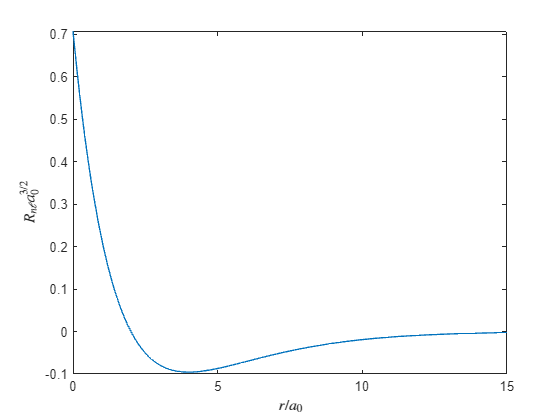

In [14]:
figure
fplot(subs(a_0^(3/2)*R_nl,{n,l,a_0},{2,0,1}))
xlim([0 15])
xlabel(' !!!EQ_146!!! ','interpreter','latex')
ylabel(' !!!EQ_202!!! ', Interpreter='latex')

In [15]:
double(int(subs(R_nl,{n,l},{3,0})*subs(R_nl,{n,l},{3,0})*r^2,r,[0,inf])) % check normalization of R_nl as in Eq. (16a)

ans = 1

In [16]:
double(int(subs(R_nl,{n,l},{2,0})*subs(R_nl,{n,l},{3,0})*r^2,r,[0,inf])) % check orthogonality of R_nl and R_n'l' for l=l' and n different from n'

ans = 0


For arbitrary $n\ge 1$ , the possible values of $\ell$ are

<a name="M_66CCA4F1"></a>

$$\begin{array}{cc} \ell =0,1,2,\ldots,n-1 & ~~~~(26) \end{array}$$

and the possible values of $m$ are

<a name="M_54543DEE"></a>

$$\begin{array}{cc} m=-\ell ,-\ell +1,\ldots,\ell -1,\ell . & ~~~~(27) \end{array}$$

Snippet below will plot modulus square of the wave function for different values of $n\ge 1$ and $\ell$ and $m$ satisfying Eqs. ([26](#M_66CCA4F1)) and ([27](#M_54543DEE)) respectively.



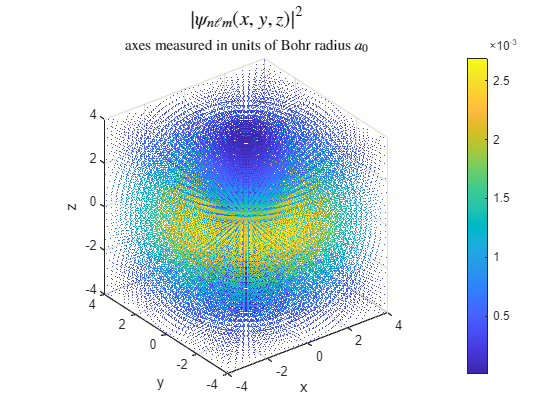

In [17]:
syms rho0 l r rho a0 positive real
u2 = whittakerW(rho0/2, l + 1/2, 2*rho);

n0=  2;     % select principal quantum number
l_allowed = string((0:n0-1));
ll = double(l_allowed(2)); % select azymuthal quantum number
m_allowed = string((-ll:ll));
m = double(m_allowed(1));  % select magnetic quantum number
u = subs(u2,rho,(r/(a0*n0)));
R = u/r;
Rnl = subs(R,{rho0,l},{2*n0,ll});
% normalization of R(r)
integral_R = int(Rnl^2*r^2,r,[0,inf]);
Rnl = Rnl/sqrt(integral_R);

syms theta phi x real
assumeAlso(phi>=0 & phi <= 2*pi)
assumeAlso(theta>=0 & theta <= pi)
pl = legendreP(ll,x);
plm = (-1)^abs(m)*sin(theta)^abs(m)*subs(diff(pl,x,abs(m)),x,cos(theta));
a = (2*ll+1)*factorial(ll-abs(m));
b = 4*sym(pi)*factorial(ll+abs(m));
C = sqrt(a/b);
ylm = C .*plm .*exp(1i*abs(m)*phi);
if m < 0
    ylm = (-1)^abs(m)*conj(ylm);
end

dx = pi/60;
col = 0:dx:pi;
az = 0:dx:2*pi;
radi = 0:0.2:10;
[Phi,Theta,Radi] = meshgrid(az,col,radi);

Plm = legendre(ll,cos(Theta));
if ll ~= 0
    Plm = reshape(Plm(abs(m)+1,:,:),size(Phi));
end
Ylm = double(C) .*Plm .*exp(1i*abs(m)*Phi);
if m < 0
    Ylm = (-1)^abs(m) * conj(Ylm);
end
F_Rnl = matlabFunction(subs(Rnl,{a0},{1}));
Rnl_value = F_Rnl(Radi);
Psi = Rnl_value .* Ylm;
Rho = abs(Psi).^2;
intens_control=10^(-4-ll);
pos = Rho>intens_control;   % adjust the lower bound to play with the plot intensities
Rho = Rho(pos);
Phi = Phi(pos);
Theta = Theta(pos);
Radi = Radi(pos);
[X,Y,Z] = sph2cart(Phi,pi/2-Theta,Radi);
figure
scatter3(X(:),Y(:),Z(:),1e-1,Rho(:))
xlim([-(3*ll+1) 3*ll+1])
ylim([-(3*ll+1) 3*ll+1])
zlim([-(3*ll+1) 3*ll+1])
pbaspect([1 1 1])
xlabel('x')
ylabel('y')
zlabel('z')
colorbar
title(" $|\psi_{n\ell m}(x,y,z)|^2$ ", Interpreter='latex',Fontsize=15)
subtitle("axes measured in units of Bohr radius $a_0$ ", Interpreter='latex')

<a name="H_48B4D4FE"></a>
<a name="H_F2E6B298"></a>

## Shell Model of an Atom

The shell model of an atom is a model in quantum mechanics that explains the structure of electrons in an atom based on their *energy levels* and  *quantum numbers* and the fact that electrons are fermions, obeying the Pauli principle of exclusion. In this model, electrons occupy different shells, which are energy levels that are separated by a certain energy gap. The shells are labeled by the principal quantum number $n$ , which describes the energy level of the electron. An atom's $n$ \-th electron shell can accommodate $2n^2$ electrons, the factor of $2$ accounting for the spin degeneracy.


Each shell can be further divided into subshells that are labeled by the angular momentum quantum number $\ell$ and its magnetic quantum number $m$ . Number $\ell$ ranges from 0 to $n-1$ and determines the shape of the orbital. The values $\ell =0,1,2,3$ correspond to the $s,p,d$ , and $f$ orbitals, respectively. Only $s$ \-orbitals are spherically symmetric. The magnetic quantum number $m$ specifies the orientation of the orbital in space and varies from $-\ell$ to $+\ell$ . Each subshell can hold up to $2(2\ell +1)$ electrons.


The shell model provides a simplified picture of the electronic structure of an atom and has applications in understanding electron configurations and predicting the chemical behavior of elements.

<a name="H_CD8B0DFB"></a>

### Radial Electron Density in Shell Model

Below we will assume that we have $N$ electrons and each is located in different (lowest energy) $s$ \-orbitals ( $1s,2s,...Ns$ ) and plot radial electron density for such case (see [Exercise 1](#M_629C7A77) for including orbitals with $\ell >0$ ).


In [18]:
syms r n positive
l=0;
a_0=1;
R_nl(r)=sqrt((2/(n*a_0))^3*factorial(n-l-1)/(2*n*factorial(n+l)))*exp(-r/(a_0*n))*((2/(n*a_0)*r)^(l))*laguerreL(n-l-1,2*l+1,2/(n*a_0)*r)

In [19]:
figure;
N=2; % select number of electrons

rho= subs(R_nl^2/(4*pi),n,1);           % contribution to electron density from 1s-orbital

for j=2:N
     rho=rho+subs(R_nl^2/(4*pi),n,j);   % contributions to electron density from higher s-orbitals 2s, 3s,... are added one at a step
end


Next we check normalization of electron density: $\int \rho (r)dr=4\pi \int \rho (r)r^2 dr=N$ .


In [20]:
int(4*pi*rho*r^2,r,0,inf)


Finally we plot radial dependence of radial electron density $4\pi \rho (r)r^2$



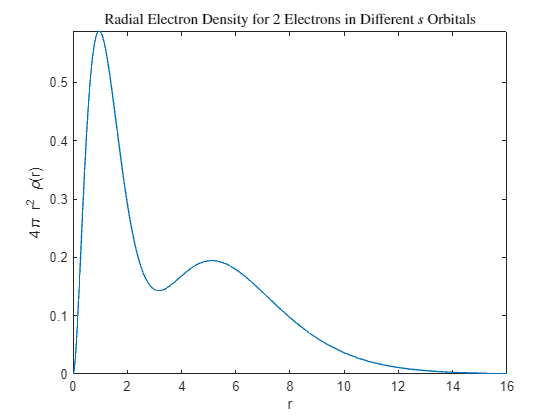

In [21]:
fplot(4*pi*rho*r^2);
xlim([0,8*N])
xlabel('r')
ylabel('4\pi r^2 \rho(r)')
title("Radial Electron Density for "+num2str(N) +" Electrons in Different $s$ Orbitals",Interpreter='latex')


Note, when $N$ electrons occupy different $s$ \-orbitals there are $N$ bumps (local maxima) in $4\pi \rho (r)r^2$ , whereas electron density $\rho (r)$ is a monotonically decreasing function with a maximum at $r=0$ .



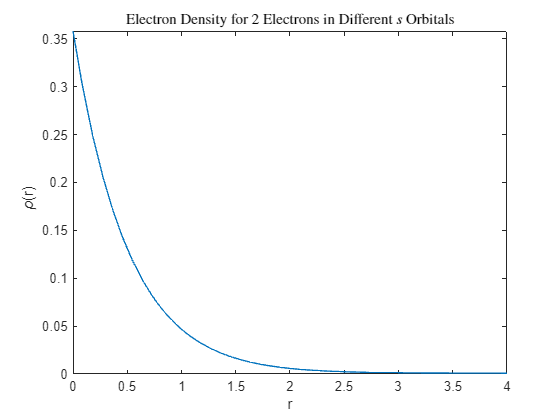

In [22]:
fplot(rho);
xlim([0,4])
xlabel('r')
ylabel(' \rho(r)')
title("Electron Density for "+num2str(N) +" Electrons in Different $s$ Orbitals",Interpreter='latex')


For $N=2$ in the ground state of helium atom (orthohelium spin\-triple state) electron coordinate configuration is $1s2s$ and is antisymmetric with respect to exchanging coordinates of two electrons.


<a name="H_7CA93714"></a>
\matlabheading{ 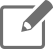**Exercises**}
<a name="M_629C7A77"></a>

**Exercise 1:** Take neon atom with 10 electrons. Assume electrons do not interact with each other. Assume that in the ground state $1s$ , $2s$ , and $2p$ orbitals (subshells) are completely filled by 2,  2, and 6 electrons respectively (with spin up and spin down electrons). Calculate and plot ground state electron density $\rho_0 (r)=\rho_{0\uparrow } (r)+\rho_{0\downarrow } (r)$ , where


$$\rho_{0\uparrow } (r)=\rho_{0\downarrow } (r)=\sum_{n,\ell ,m} |\psi_{n\ell m} (r)|^2 =|\psi_{100} (r)|^2 +|\psi_{200} (r)|^2 +\sum_{m=(-1,0,1)} |\psi_{21m} (r)|^2 .$$

Hint: use ${\sum_{m=-\ell }^{\ell } Y_{\ell }^{m*} (\theta ,\phi )Y_{\ell }^m (\theta ,\phi )=\frac{2\ell +1}{4\pi }}$ .


**Exercise 2:** Suppose electron in hydrogen atom is in a superposition state $\psi =(\psi_{210} +\psi_{21-1} +\psi_{211} )/\sqrt{3}$ . Plot $|\psi (x,y,z)|^2$ . Does it have a spherical symmetry?


<a name="M_15B4DF24"></a>

\[\*\] By introducing positive half\-odd integer $\mu =1/2,3/2,...$ and non\-negative integer $\alpha =0,1,2,...$ as: $\mu =\ell +1/2$ and $\alpha =n-\ell -1$ , we write Whittaker W and M functions as $W_{n,\ell +\frac{1}{2}} (x)=W_{\mu +\alpha +\frac{1}{2},\mu } (x)$ and $M_{n,\ell +\frac{1}{2}} (x)=M_{\mu +\alpha +\frac{1}{2},\mu } (x)$ .


&nbsp;&nbsp;&nbsp;&nbsp; For positive half\-odd integer $\mu =1/2,3/2,...$ and non\-negative integer $\alpha =0,1,2,...$ there exists the following relation between Whittaker W, Whittaker M and Laguerre polynomial:

<a name="M_F5B1AFC4"></a>

$$W_{\mu +\alpha +\frac{1}{2},\mu } (x)=(-1)^{\alpha } \frac{\Gamma (2\mu +\alpha +1)}{\Gamma (2\mu +1)}M_{\mu +\alpha +\frac{1}{2},\mu } (x)=(-1)^{\alpha } \alpha !x^{\mu +1/2} e^{-x/2} L_{\alpha }^{2\mu } (x).~~~~(28)$$

We check relations in Eq. ([28](#M_F5B1AFC4)) using symbolic plotting.



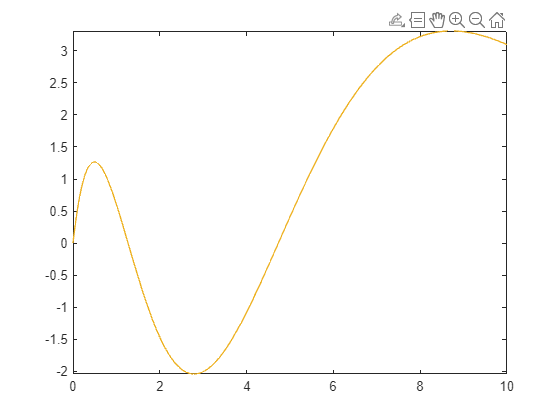

In [23]:
syms x
mu=1/2;
alpha=2;
fplot(whittakerW(mu+alpha+1/2,mu,x),[0,10])
hold on
fplot((-1)^alpha*gamma(2*mu+alpha+1)/(gamma(2*mu+1))*whittakerM(mu+alpha+1/2,mu,x),[0,10])
hold on
fplot(gamma(alpha+1)*(-1)^alpha*x^(mu+1/2)*exp(-x/2)*laguerreL(alpha,2*mu,x),[0,10])
hold off


<a name="H_B6FE4BF1"></a>

## **References**
<a name="M_4A7A5AA6"></a>

\[1\] T. Vekua, [Breit\-Rabi diagram for alkali metal atoms](https://www.mathworks.com/matlabcentral/fileexchange/87819-breit-rabi-diagram-for-alkali-metal-atoms?s_tid=srchtitle).

<a name="M_B67A6622"></a>

\[2\] L. I. Schiff, *Quantum Mechanics,* 3rd Edition, McGraw\-Hill, New York (1968).

